In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame, specifying 'latin1' encoding
df = pd.read_csv('/content/OnlineRetail.csv', encoding='latin1')
print("DataFrame loaded successfully.")

# Display the first 5 rows of the DataFrame
print("\nFirst 5 rows of the DataFrame:")
print(df.head())

# Print the concise summary of the DataFrame, including data types and non-null values
print("\nDataFrame Info:")
df.info()

# Print the number of missing values for each column
print("\nMissing values per column:")
print(df.isnull().sum())

DataFrame loaded successfully.

First 5 rows of the DataFrame:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150444 entries, 0 to 150443
Data columns (total 8 columns):
 #   Column       Non-N

In [ ]:
import numpy as np

# 1. Convert 'InvoiceDate' to datetime objects
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
print("Converted 'InvoiceDate' to datetime objects.")

# 2. Remove rows where 'CustomerID' is missing
df.dropna(subset=['CustomerID'], inplace=True)
print("Removed rows with missing 'CustomerID'.")

# Convert CustomerID to integer type as it's often used as an identifier and float isn't ideal
df['CustomerID'] = df['CustomerID'].astype(int)
print("Converted 'CustomerID' to integer type.")

# 3. Create a new column named 'TotalPrice'
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
print("Created 'TotalPrice' column.")

# Display the first few rows with the new TotalPrice column and check info again
print("\nDataFrame after initial processing (head):")
print(df.head())
print("\nDataFrame Info after processing:")
df.info()
print("\nMissing values per column after processing:")
print(df.isnull().sum())

Converted 'InvoiceDate' to datetime objects.
Removed rows with missing 'CustomerID'.
Converted 'CustomerID' to integer type.
Created 'TotalPrice' column.

DataFrame after initial processing (head):
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  
0 2010-12-01 08:26:00       2.55       17850  United Kingdom       15.30  
1 2010-12-01 08:26:00       3.39       17850  United Kingdom       20.34  
2 2010-12-01 08:26:00       2.75       17850  United Kingdom       22.00  
3 2010-12-01 08:26:00       3.39       17850  United Kingdom       20

In [ ]:
print("\n--- Customer Purchase Behavior Analysis ---")

# 4. Group by 'CustomerID' and sum 'TotalPrice' for total amount spent
total_purchase_per_customer = df.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False)
print("\nTotal purchase per customer (Top 10):\n")
print(total_purchase_per_customer.head(10))

# 5. Calculate the average order value per customer
# First, calculate the total price per invoice for each customer
price_per_invoice = df.groupby(['CustomerID', 'InvoiceNo'])['TotalPrice'].sum().reset_index()
average_order_value_per_customer = price_per_invoice.groupby('CustomerID')['TotalPrice'].mean().sort_values(ascending=False)
print("\nAverage order value per customer (Top 10):\n")
print(average_order_value_per_customer.head(10))

# 6. Count the number of unique 'InvoiceNo' for purchase frequency per customer
purchase_frequency_per_customer = df.groupby('CustomerID')['InvoiceNo'].nunique().sort_values(ascending=False)
print("\nPurchase frequency per customer (number of unique orders, Top 10):\n")
print(purchase_frequency_per_customer.head(10))

# 7. Determine the most frequently purchased products by grouping 'Description' and summing 'Quantity'
popular_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False)
print("\nMost frequently purchased products (Top 10):\n")
print(popular_products.head(10))



--- Customer Purchase Behavior Analysis ---

Total purchase per customer (Top 10):

CustomerID
14646    81567.62
18102    45279.41
12415    38024.04
14156    35119.44
17450    33017.46
15061    26889.76
17511    25357.89
14911    23363.26
15769    23181.48
15749    22998.40
Name: TotalPrice, dtype: float64

Average order value per customer (Top 10):

CustomerID
15749    11499.200000
14088     7544.910000
12415     6337.340000
18102     5659.926250
14646     4798.095294
12435     3978.990000
15125     3840.880000
13340     3678.030000
17450     3668.606667
12451     2919.510000
Name: TotalPrice, dtype: float64

Purchase frequency per customer (number of unique orders, Top 10):

CustomerID
12748    61
14911    51
14606    51
15311    45
17841    43
13089    39
17850    35
15061    31
16422    30
12971    30
Name: InvoiceNo, dtype: int64

Most frequently purchased products (Top 10):

Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     17140
JUMBO BAG RED RETROSPOT               13249
PACK 

In [ ]:
print("\n--- Identifying Revenue Leakage Areas ---")

# 1. Identify all transactions where 'Quantity' is negative (returns/cancellations)
negative_quantity_transactions = df[df['Quantity'] < 0].copy()
print("Identified transactions with negative quantities.")

# Display some information about these transactions
print("\nNegative Quantity Transactions (head):\n")
print(negative_quantity_transactions.head())
print("\nNegative Quantity Transactions Info:\n")
negative_quantity_transactions.info()


--- Identifying Revenue Leakage Areas ---
Identified transactions with negative quantities.

Negative Quantity Transactions (head):

    InvoiceNo StockCode                       Description  Quantity  \
141   C536379         D                          Discount        -1   
154   C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235   C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236   C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237   C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   

            InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  
141 2010-12-01 09:41:00      27.50       14527  United Kingdom      -27.50  
154 2010-12-01 09:49:00       4.65       15311  United Kingdom       -4.65  
235 2010-12-01 10:24:00       1.65       17548  United Kingdom      -19.80  
236 2010-12-01 10:24:00       0.29       17548  United Kingdom       -6.96  
237 2010-12-01 10:24:00       0.29       17548  United

In [ ]:
print('\n--- Calculating Total Monetary Value of Returns/Cancellations ---')

# 2. Calculate the total monetary value of these returned/canceled items
total_returned_value = negative_quantity_transactions['TotalPrice'].sum()
print(f"Total monetary value of returned/canceled items: £{total_returned_value:,.2f}")


--- Calculating Total Monetary Value of Returns/Cancellations ---
Total monetary value of returned/canceled items: £-150,311.42


In [ ]:
print('\n--- Identifying Top 10 Most Returned/Canceled Products ---')

# 3. Identify the top 10 most returned/canceled products by grouping the negative quantity transactions
#    by 'Description' and summing their absolute 'Quantity'.
top_returned_products = negative_quantity_transactions.groupby('Description')['Quantity'].sum().abs().sort_values(ascending=False)
print('\nTop 10 most returned/canceled products (by absolute quantity):\n')
print(top_returned_products.head(10))


--- Identifying Top 10 Most Returned/Canceled Products ---

Top 10 most returned/canceled products (by absolute quantity):

Description
MEDIUM CERAMIC TOP STORAGE JAR         74215
ROTATING SILVER ANGELS T-LIGHT HLDR     9366
Discount                                 737
ASSORTED COLOURS SILK FAN                648
ROUND SNACK BOXES SET OF 4 FRUITS        634
Manual                                   576
WHITE HANGING HEART T-LIGHT HOLDER       565
REGENCY CAKESTAND 3 TIER                 376
GOLD MINI TAPE MEASURE                   300
VICTORIAN SEWING KIT                     289
Name: Quantity, dtype: int64


In [ ]:
print('\n--- Identifying Customers with Net Negative Purchase Amount ---')

# 4. Identify customers with a net negative total purchase amount
customers_net_negative_purchase = total_purchase_per_customer[total_purchase_per_customer < 0].sort_values()

print('\nTop 10 customers with a net negative total purchase amount (returns/cancellations exceeding purchases):\n')
print(customers_net_negative_purchase.head(10))


--- Identifying Customers with Net Negative Purchase Amount ---

Top 10 customers with a net negative total purchase amount (returns/cancellations exceeding purchases):

CustomerID
14213   -1192.20
12503   -1126.00
15823    -840.76
17603    -555.90
16252    -295.09
12666    -227.44
14304    -186.35
17307    -152.64
17548    -141.48
13958    -102.45
Name: TotalPrice, dtype: float64


--- Visualizing Key Findings ---


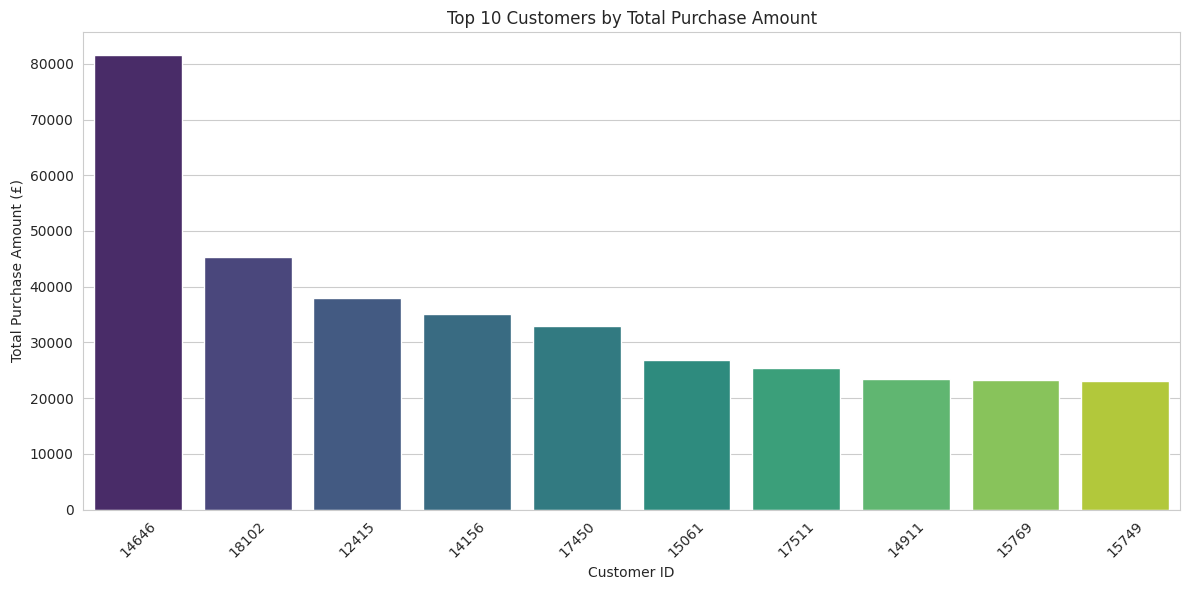

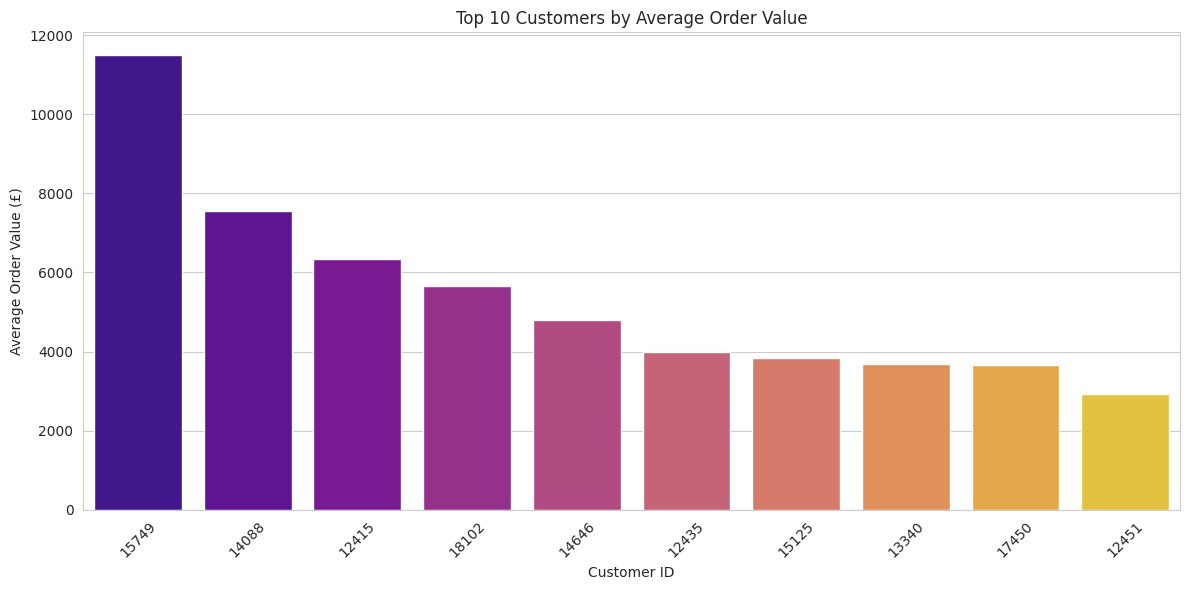

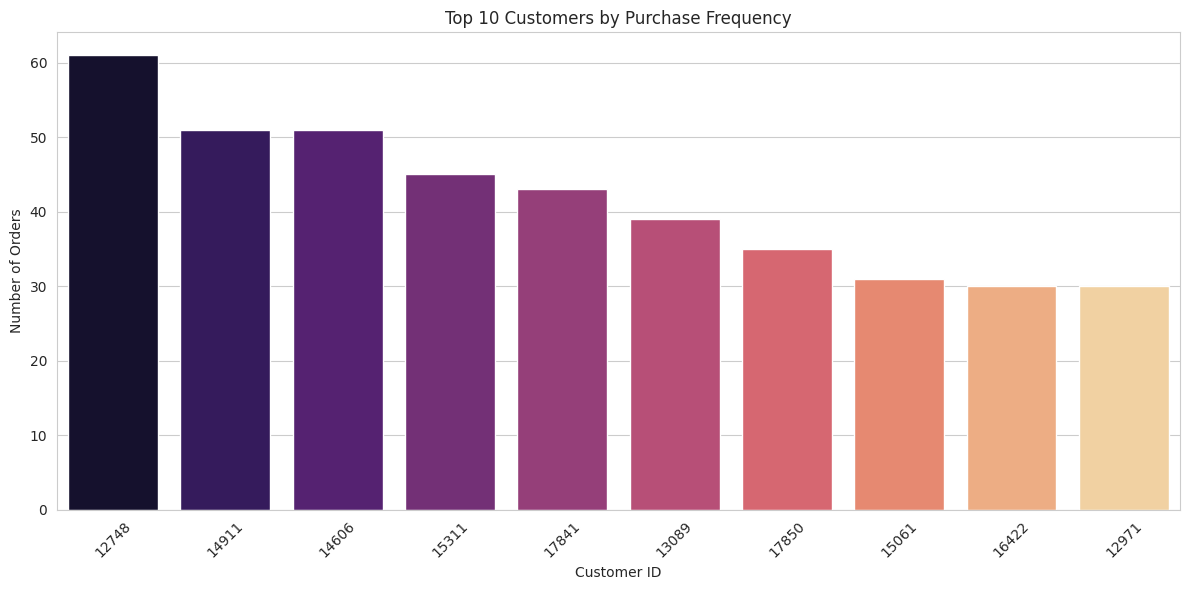

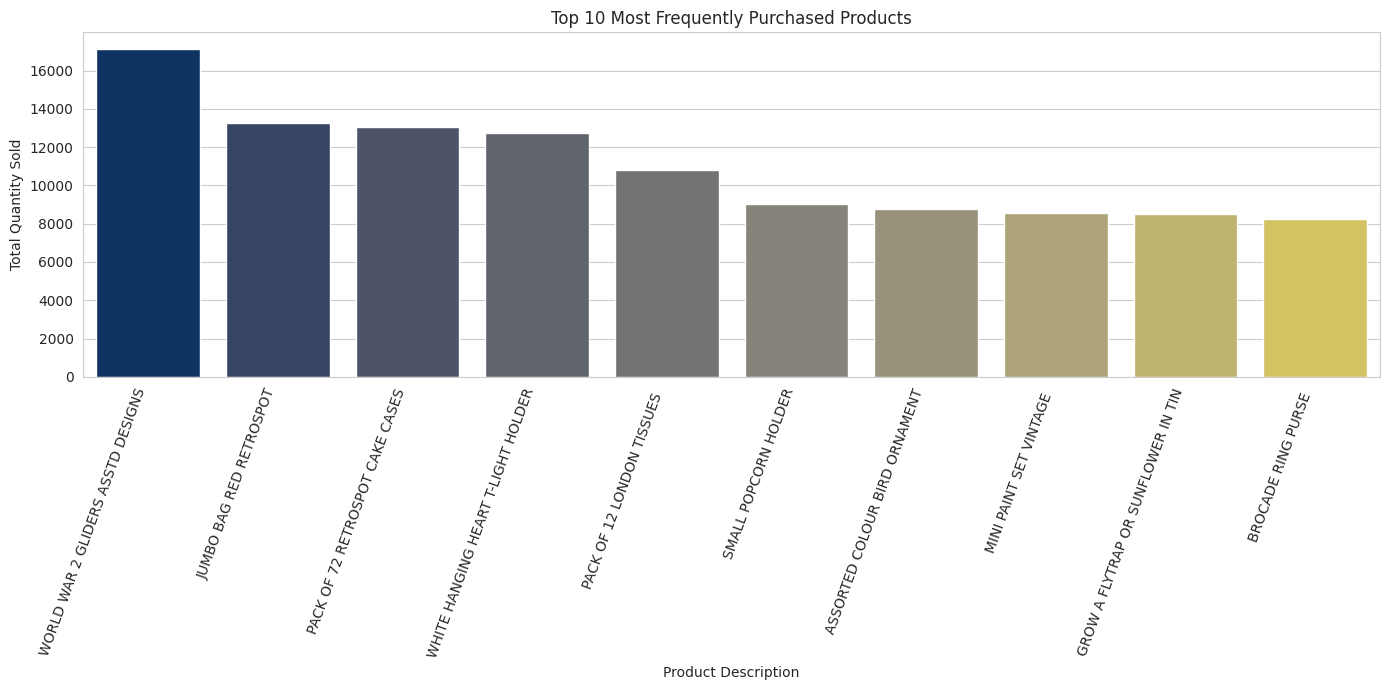

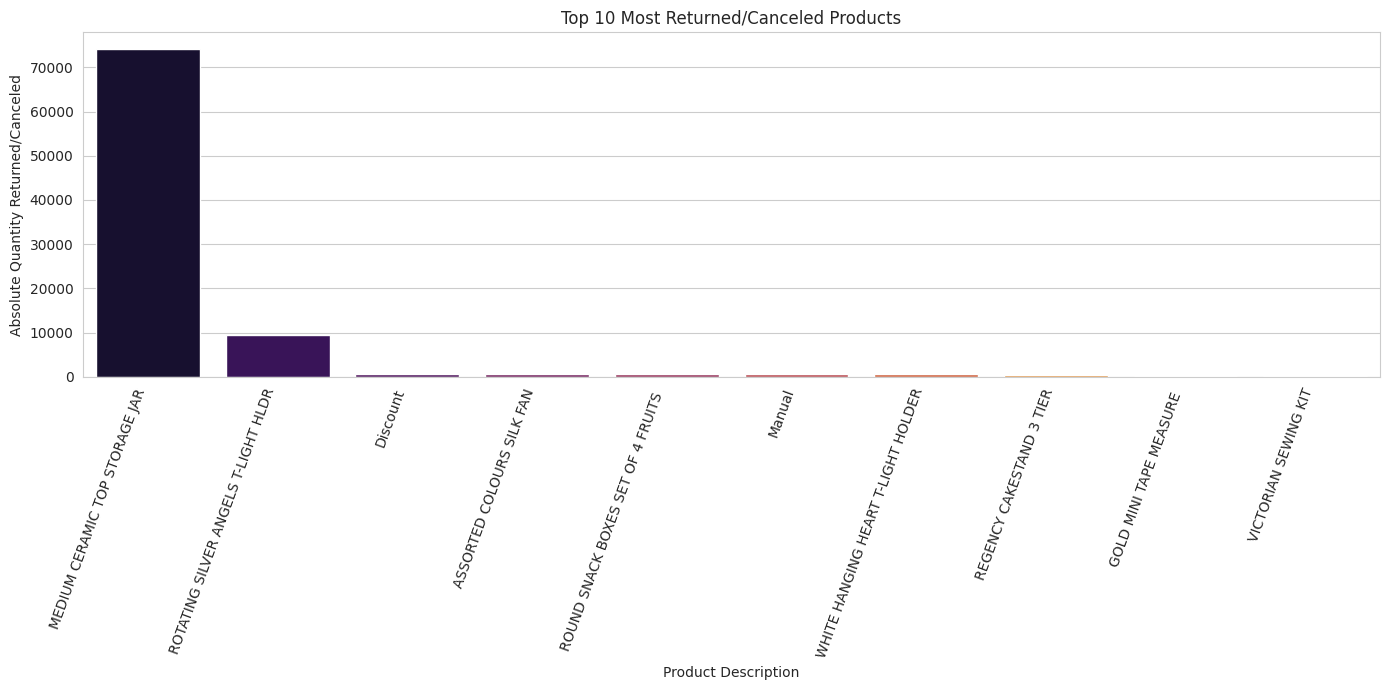

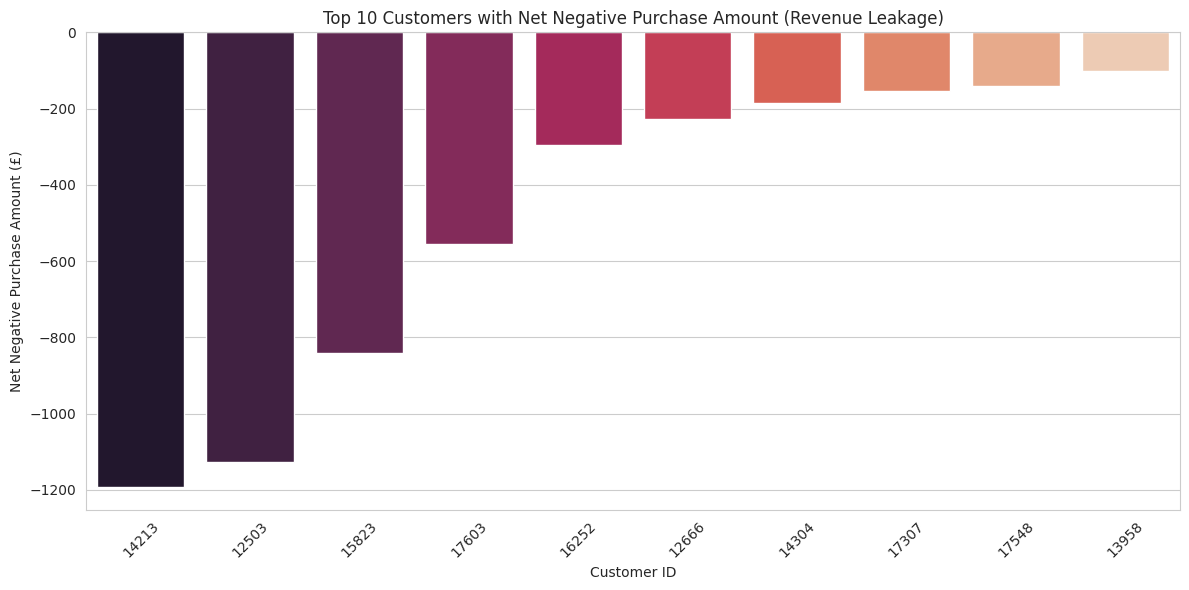

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
sns.set_style("whitegrid")

print("--- Visualizing Key Findings ---")

# 1. Bar plot for the top 10 customers by total purchase amount
plt.figure(figsize=(12, 6))
sns.barplot(x=total_purchase_per_customer.head(10).index.astype(str), y=total_purchase_per_customer.head(10).values, hue=total_purchase_per_customer.head(10).index.astype(str), palette='viridis', legend=False)
plt.title('Top 10 Customers by Total Purchase Amount')
plt.xlabel('Customer ID')
plt.ylabel('Total Purchase Amount (£)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Bar plot for the top 10 customers by average order value
plt.figure(figsize=(12, 6))
sns.barplot(x=average_order_value_per_customer.head(10).index.astype(str), y=average_order_value_per_customer.head(10).values, hue=average_order_value_per_customer.head(10).index.astype(str), palette='plasma', legend=False)
plt.title('Top 10 Customers by Average Order Value')
plt.xlabel('Customer ID')
plt.ylabel('Average Order Value (£)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Bar plot for the top 10 customers by purchase frequency
plt.figure(figsize=(12, 6))
sns.barplot(x=purchase_frequency_per_customer.head(10).index.astype(str), y=purchase_frequency_per_customer.head(10).values, hue=purchase_frequency_per_customer.head(10).index.astype(str), palette='magma', legend=False)
plt.title('Top 10 Customers by Purchase Frequency')
plt.xlabel('Customer ID')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Bar plot for the top 10 most frequently purchased products
plt.figure(figsize=(14, 7))
sns.barplot(x=popular_products.head(10).index, y=popular_products.head(10).values, hue=popular_products.head(10).index, palette='cividis', legend=False)
plt.title('Top 10 Most Frequently Purchased Products')
plt.xlabel('Product Description')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=70, ha='right') # Rotate for better readability
plt.tight_layout()
plt.show()

# 5. Bar plot for the top 10 most returned/canceled products
plt.figure(figsize=(14, 7))
sns.barplot(x=top_returned_products.head(10).index, y=top_returned_products.head(10).values, hue=top_returned_products.head(10).index, palette='inferno', legend=False)
plt.title('Top 10 Most Returned/Canceled Products')
plt.xlabel('Product Description')
plt.ylabel('Absolute Quantity Returned/Canceled')
plt.xticks(rotation=70, ha='right') # Rotate for better readability
plt.tight_layout()
plt.show()

# 6. Bar plot for the top 10 customers with a net negative total purchase amount
plt.figure(figsize=(12, 6))
sns.barplot(x=customers_net_negative_purchase.head(10).index.astype(str), y=customers_net_negative_purchase.head(10).values, hue=customers_net_negative_purchase.head(10).index.astype(str), palette='rocket', legend=False)
plt.title('Top 10 Customers with Net Negative Purchase Amount (Revenue Leakage)')
plt.xlabel('Customer ID')
plt.ylabel('Net Negative Purchase Amount (£)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()